In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.util import bigrams
import geopandas as gpd
import warnings
warnings.filterwarnings('ignore', message='.*initial implementation of Parquet.*')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score

ModuleNotFoundError: No module named 'nltk'

In [2]:
# requires to be connected to a properly configured python environment with tensorflow etc.
import tensorflow as tf
from tensorflow import keras
keras.__version__

Init Plugin


'2.5.0'

Init Graph Optimizer
Init Kernel


In [179]:
tf.config.run_functions_eagerly(True)

In [3]:
try:
    LIREg = gpd.read_parquet("../data/large_data/LIREg.parquet")
    print("read locally")
except:
    LIREg = gpd.read_file("https://zenodo.org/record/5074774/files/LIREg.geojson?download=1", driver="geoJSON")
    LIREg.to_parquet("../data/large_data/LIREg.parquet")
    print("locally not available yet, need to download")
LIREg.head()

read locally


,EDCS-ID,publication,province,province_list,place,place_list,end_yr_list,notes_dating,status_list,inscr_type,...,within_rome,nearest_city,city_id_hanson,city_pop_est,city_geometry,nearest_city_type,nearest_city_dist,type_of_inscription_auto,type_of_inscription_auto_prob,geometry
0,EDCS-03700724,"ZPE-108-159 = Thesprotia 00001 = AE 1993, 0140...",Achaia,Achaia,Agios Athanasios / Photike,"['Agios Athanasios', 'Photike']",313,,"['Augusti/Augustae', 'litterae erasae', 'ordo ...",tituli honorarii,...,False,Dodona,31,1000.0,"[20.787767, 39.546432]",minor,0.097513,honorific inscription,1.0,POINT (20.76680 39.45120)
1,EDCS-03300852,"AE 1995, 01409",Achaia,Achaia,Alea / Tegea,"['Alea', 'Tegea']",276,to 276; b: 276 to 282 \n\n,"['Augusti/Augustae', 'miliaria', 'viri']",miliaria,...,False,Tegea,97,46362.0,"[22.417226, 37.427653]",big,0.004249,mile-/leaguestone,1.0,POINT (22.41710 37.43190)
2,EDCS-28500283,"CIL 03, 07251 = D 00214 = NDIEC-07, p 81 = AE ...",Achaia,Achaia,Alea / Tegea,"['Alea', 'Tegea']",50,,"['Augusti/Augustae', 'leges', 'viri']",leges,...,False,Tegea,97,46362.0,"[22.417226, 37.427653]",big,0.004249,public legal inscription,1.0,POINT (22.41710 37.43190)
3,EDCS-09400671,"CIMRM-02, 02350 = IG-12, 00274 = Andros 00124 ...",Achaia,Achaia,Andros,Andros,209,,"['litterae erasae', 'tituli sacri']",tituli sacri,...,False,Ioulis,47,1000.0,"[24.34625, 37.633122]",minor,0.520308,votive inscription,1.0,POINT (24.83230 37.81880)
4,EDCS-24600769,"AE 1995, 01407 = AE 2001, 01812",Achaia,Achaia,Archea Olimpia / Archaia Olympia / Olympia,"['Archea Olimpia', 'Archaia Olympia', 'Olympia']",96,,{ },{ },...,False,Elis,35,1000.0,"[21.435443, 37.827452]",minor,0.262624,owner/artist inscription,1.0,POINT (21.62710 37.64790)


In [4]:
LIREg.head(5)

,EDCS-ID,publication,province,province_list,place,place_list,end_yr_list,notes_dating,status_list,inscr_type,...,within_rome,nearest_city,city_id_hanson,city_pop_est,city_geometry,nearest_city_type,nearest_city_dist,type_of_inscription_auto,type_of_inscription_auto_prob,geometry
0,EDCS-03700724,"ZPE-108-159 = Thesprotia 00001 = AE 1993, 0140...",Achaia,Achaia,Agios Athanasios / Photike,"['Agios Athanasios', 'Photike']",313,,"['Augusti/Augustae', 'litterae erasae', 'ordo ...",tituli honorarii,...,False,Dodona,31,1000.0,"[20.787767, 39.546432]",minor,0.097513,honorific inscription,1.0,POINT (20.76680 39.45120)
1,EDCS-03300852,"AE 1995, 01409",Achaia,Achaia,Alea / Tegea,"['Alea', 'Tegea']",276,to 276; b: 276 to 282 \n\n,"['Augusti/Augustae', 'miliaria', 'viri']",miliaria,...,False,Tegea,97,46362.0,"[22.417226, 37.427653]",big,0.004249,mile-/leaguestone,1.0,POINT (22.41710 37.43190)
2,EDCS-28500283,"CIL 03, 07251 = D 00214 = NDIEC-07, p 81 = AE ...",Achaia,Achaia,Alea / Tegea,"['Alea', 'Tegea']",50,,"['Augusti/Augustae', 'leges', 'viri']",leges,...,False,Tegea,97,46362.0,"[22.417226, 37.427653]",big,0.004249,public legal inscription,1.0,POINT (22.41710 37.43190)
3,EDCS-09400671,"CIMRM-02, 02350 = IG-12, 00274 = Andros 00124 ...",Achaia,Achaia,Andros,Andros,209,,"['litterae erasae', 'tituli sacri']",tituli sacri,...,False,Ioulis,47,1000.0,"[24.34625, 37.633122]",minor,0.520308,votive inscription,1.0,POINT (24.83230 37.81880)
4,EDCS-24600769,"AE 1995, 01407 = AE 2001, 01812",Achaia,Achaia,Archea Olimpia / Archaia Olympia / Olympia,"['Archea Olimpia', 'Archaia Olympia', 'Olympia']",96,,{ },{ },...,False,Elis,35,1000.0,"[21.435443, 37.827452]",minor,0.262624,owner/artist inscription,1.0,POINT (21.62710 37.64790)


In [7]:
EDH_overlap_all = LIREg[(LIREg["EDH-ID"].notnull()) & (LIREg["EDCS-ID"].notnull())]
EDH_overlap = EDH_overlap_all[~EDH_overlap_all["type_of_inscription_clean"].str.contains("NULL")]
EDH_overlap.groupby("type_of_inscription_clean").size().sort_values(ascending=False)

type_of_inscription_clean
epitaph                            21520
votive inscription                 11728
owner/artist inscription            3340
honorific inscription               3003
building/dedicatory inscription     2561
mile-/leaguestone                   1307
identification inscription           850
acclamation                          287
defixio                              269
list                                 246
military diploma                     209
label                                194
boundary inscription                 175
elogium                              132
letter                               119
public legal inscription             109
seat inscription                      42
private legal inscription             36
prayer                                18
assignation inscription               15
calendar                              10
adnuntiatio                            1
dtype: int64

In [8]:
len(EDH_overlap.groupby("type_of_inscription_clean").size().sort_values(ascending=False))

22

In [9]:
classes_sorted = [key for key in dict(EDH_overlap.groupby("type_of_inscription_clean").size().sort_values(ascending=False))]
# alternative, treat whole dataset as a sample
EDH_sampled = EDH_overlap

y = EDH_sampled["type_of_inscription_clean"].tolist()
y[:10]

['honorific inscription',
 'mile-/leaguestone',
 'public legal inscription',
 'votive inscription',
 'owner/artist inscription',
 'public legal inscription',
 'honorific inscription',
 'building/dedicatory inscription',
 'building/dedicatory inscription',
 'building/dedicatory inscription']

In [24]:
set(y)

{'acclamation',
 'adnuntiatio',
 'assignation inscription',
 'boundary inscription',
 'building/dedicatory inscription',
 'calendar',
 'defixio',
 'elogium',
 'epitaph',
 'honorific inscription',
 'identification inscription',
 'label',
 'letter',
 'list',
 'mile-/leaguestone',
 'military diploma',
 'owner/artist inscription',
 'prayer',
 'private legal inscription',
 'public legal inscription',
 'seat inscription',
 'votive inscription'}

In [10]:
len(a)

22

In [16]:
labels_dict = {}
for i, label in enumerate(list(set(y))):
    labels_dict[label] = i

In [26]:
# y
y = [labels_dict[label] for label in y]
y# labels to integers (otherwise the code below does not work...)

[14,
 8,
 17,
 1,
 9,
 17,
 14,
 16,
 16,
 16,
 12,
 16,
 15,
 1,
 15,
 15,
 15,
 15,
 15,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 12,
 15,
 14,
 16,
 14,
 15,
 15,
 14,
 15,
 15,
 14,
 3,
 14,
 14,
 14,
 15,
 15,
 1,
 14,
 15,
 15,
 17,
 15,
 14,
 14,
 14,
 14,
 14,
 15,
 14,
 14,
 15,
 14,
 1,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 1,
 15,
 15,
 14,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 14,
 14,
 14,
 14,
 14,
 16,
 16,
 16,
 14,
 1,
 16,
 15,
 17,
 16,
 17,
 17,
 14,
 15,
 16,
 8,
 15,
 14,
 1,
 8,
 1,
 14,
 15,
 15,
 15,
 1,
 9,
 1,
 1,
 17,
 15,
 0,
 15,
 9,
 15,
 15,
 15,
 9,
 14,
 14,
 14,
 16,
 16,
 8,
 1,
 14,
 14,
 1,
 1,
 9,
 15,
 14,
 15,
 15,
 15,
 17,
 15,
 16,
 15,
 15,
 16,
 17,
 15,
 16,
 15,
 9,
 17,
 1,
 16,
 14,
 1,
 16,
 14,
 8,
 17,
 15,
 1,
 15,
 15,
 17,
 7,
 14,
 16,
 1,
 1,
 15,
 12,
 9,
 9,
 9,
 15,
 12,
 1,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 16,
 1,
 1,
 15,
 15,
 15,
 15,
 8,
 15,
 15,
 15,
 15,
 15,
 15

In [28]:
[yval for yval in y if yval not in range(0,22)]

[]

In [29]:
def to_one_hot(y, dimension=22):
    results = np.zeros((len(y), dimension))
    for i, label in enumerate(y):
        results[i, label] = 1.
    return results

one_hot_labels = to_one_hot(y)

In [30]:
one_hot_labels[:10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [32]:
inscr_texts = EDH_sampled["clean_text_interpretive_word"].tolist()

In [33]:
def get_bigrams_underscore(inscr_text):
    try:
        inscr_bigrams = [" ".join(el) for el in list(bigrams(inscr_text.split()))]
        inscr_bigrams_ = [bigram.replace(" ", "_") for bigram in inscr_bigrams]
    except:
        inscr_bigrams_ = []
    return inscr_bigrams_

In [37]:
EDH_bigrams_ = [get_bigrams_underscore(inscr_text) for inscr_text in inscr_texts]
EDH_bigrams_[:5]

[['Fortissimo_et',
  'et_piissimo',
  'piissimo_Caesari',
  'Caesari_domino',
  'domino_nostro',
  'nostro_Galerio',
  'Galerio_Valerio',
  'Valerio_Maximiano',
  'Maximiano_Pio',
  'Pio_Felici',
  'Felici_Invicto',
  'Invicto_Coranius',
  'Coranius_Titianus',
  'Titianus_vir',
  'vir_perfectissimus',
  'perfectissimus_praeses',
  'praeses_provinciae',
  'provinciae_veteris',
  'veteris_Epiri',
  'Epiri_numini',
  'numini_eorum',
  'eorum_dicatissimus'],
 ['Imperatori_Caesari',
  'Caesari_Marco',
  'Marco_Annio',
  'Annio_Floriano',
  'Floriano_Pio',
  'Pio_Felici',
  'Felici_Augusto',
  'Augusto_patri',
  'patri_patriae',
  'patriae_milia',
  'milia_passuum',
  'passuum_III',
  'III_Imperatori',
  'Imperatori_Caesari',
  'Caesari_Marco',
  'Marco_Aurelio',
  'Aurelio_Probo',
  'Probo_Pio',
  'Pio_Felici',
  'Felici_Augusto',
  'Augusto_milia',
  'milia_passuum',
  'passuum_II'],
 ['Tiberius_Claudius',
  'Claudius_Caesar',
  'Caesar_Augustus',
  'Augustus_Germanicus',
  'Germanicus_pon

In [38]:
# flat list of all bigrams
bigrams_list = [el for sublist in EDH_bigrams_ for el in sublist]
bigrams_list[:10]

['Fortissimo_et',
 'et_piissimo',
 'piissimo_Caesari',
 'Caesari_domino',
 'domino_nostro',
 'nostro_Galerio',
 'Galerio_Valerio',
 'Valerio_Maximiano',
 'Maximiano_Pio',
 'Pio_Felici']

In [39]:
# ok, let's list only N of the most common
bigrams_mostfreq = nltk.FreqDist(bigrams_list).most_common()
bigrams_mostfreq = [tup[0] for tup in bigrams_mostfreq]
bigrams_mostfreq[:10]

['Dis_Manibus',
 'vixit_annos',
 'votum_solvit',
 'solvit_libens',
 'libens_merito',
 'Iovi_Optimo',
 'Optimo_Maximo',
 'hic_situs',
 'situs_est',
 'tribunicia_potestate']

In [40]:
all_bigrams_freq_dict = dict(nltk.FreqDist(bigrams_list).most_common())
EDH_sampled["bigrams"] = EDH_bigrams_
all_bigrams_freq_dict


/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


{'Dis_Manibus': 7844,
 'vixit_annos': 4084,
 'votum_solvit': 3335,
 'solvit_libens': 2982,
 'libens_merito': 2710,
 'Iovi_Optimo': 2413,
 'Optimo_Maximo': 2399,
 'hic_situs': 2338,
 'situs_est': 2228,
 'tribunicia_potestate': 1990,
 'Manibus_sacrum': 1865,
 'bene_merenti': 1585,
 'sibi_et': 1476,
 'Imperatori_Caesari': 1256,
 'hic_sita': 1216,
 'sita_est': 1155,
 'faciendum_curavit': 1118,
 'pro_salute': 1117,
 'terra_levis': 1111,
 'Imperator_Caesar': 1099,
 'tibi_terra': 1029,
 'sit_tibi': 999,
 'vixit_annis': 996,
 'pro_praetore': 932,
 'pontifex_maximus': 837,
 'miles_legionis': 783,
 'pontifici_maximo': 780,
 'est_sit': 749,
 'maximus_tribunicia': 708,
 'maximo_tribunicia': 706,
 'ex_voto': 701,
 'Pio_Felici': 698,
 'pater_patriae': 698,
 'patri_patriae': 687,
 'divi_Nervae': 670,
 'et_suis': 664,
 'et_I': 663,
 'Marcus_Aurelius': 656,
 'qui_vixit': 634,
 'piae_fidelis': 611,
 'Caius_Iulius': 608,
 'Marco_Aurelio': 600,
 'libens_laetus': 588,
 'decreto_decurionum': 585,
 'divi_Tra

In [41]:
N = 10
weighted_bigrams_all = []
for cat in EDH_sampled["type_of_inscription_clean"].unique():
    EDH_cat = EDH_sampled[EDH_sampled["type_of_inscription_clean"]==cat]
    bigrams_list = [el for sublist in EDH_cat["bigrams"].tolist() for el in sublist]
    cat_bigrams_freq_dict = dict(nltk.FreqDist(bigrams_list).most_common())
    weighted_bigrams = []
    for word in cat_bigrams_freq_dict.keys():
        if cat_bigrams_freq_dict[word] >= 5: # it it appears at least twice
            weighted_bigrams.append((word, cat_bigrams_freq_dict[word] / all_bigrams_freq_dict[word]))
    # choose only N of the most characteristic bigrams for given category
    weighted_bigrams = sorted(weighted_bigrams, key=lambda tup: tup[1], reverse=True)[:N]
    weighted_bigrams = [tup[0] for tup in weighted_bigrams]
    weighted_bigrams_all.extend(weighted_bigrams)

In [42]:
def combine_status_list_and_bigrams(el_status, el_bigrams, el_material):
    # preprocess status:
    try: el_status = eval(el_status)
    except: pass
    if isinstance(el_status, list):
        new_el_status = el_status
    elif isinstance(el_status, str):
        new_el_status = [el_status]
    else:
        new_el_status = []
    new_el_status = [el.replace(" ", "_") for el in new_el_status]
    # preprocess material:
    if el_material is None:
        el_material = []
    else:
        el_material = el_material.partition(": ")[0] #
        el_material = el_material.split(", ")
        el_material = [el.replace(" ", "_").replace("?", "") for el in el_material]
    # combine status, bigrams and material
    new_el = new_el_status + el_bigrams + el_material
    new_el = " ".join(new_el)
    return new_el, new_el_status, el_material

In [43]:
status_bigrams_list = []
status_list = []
material_list = []
for el_status, el_bigrams, el_material in zip(EDH_sampled["status_list"].tolist(), EDH_sampled["bigrams"].tolist(), EDH_sampled["Material"].tolist()):
    new_el, new_status, el_material = combine_status_list_and_bigrams(el_status, el_bigrams, el_material)
    status_bigrams_list.append(new_el)
    status_list.append(new_status)
    material_list.extend(el_material)

In [47]:
materials_freqdist = nltk.FreqDist(material_list).most_common()
len(materials_freqdist)

18

In [48]:
materials_freqdist

[('lapis', 22042),
 ('opus_figlinae', 2247),
 ('aes', 796),
 ('plumbum', 528),
 ('lignum', 289),
 ('argentum', 289),
 ('aurum', 82),
 ('vitrum', 63),
 ('ferrum', 60),
 ('tectorium', 58),
 ('musivum', 27),
 ('steatitis', 11),
 ('os', 10),
 ('cyprum', 6),
 ('gemma', 4),
 ('rupes', 4),
 ('corium', 1),
 ('sucineus', 1)]

In [49]:
N = 20
materials_N = [tup[0] for tup in materials_freqdist[:N]]
len(materials_N)

18

In [45]:
status_list_flat = [el for sublist in status_list for el in sublist]
status_N = [tup[0] for tup in nltk.FreqDist(status_list_flat).most_common(100)] ### we had 228 in total
status_N[:10]

['viri',
 'tituli_sepulcrales',
 'tria_nomina',
 'tituli_sacri',
 'mulieres',
 'milites',
 'nomen_singulare',
 'Augusti/Augustae',
 'tituli_operum',
 'tituli_fabricationis']

In [51]:
el_status = EDH_sampled["status_list"].tolist()[0]
status_list_flat = [el for sublist in status_list for el in sublist]
status_N = [tup[0] for tup in nltk.FreqDist(status_list_flat).most_common(100)] ### we had 228 in total
status_N[:10]

['viri',
 'tituli_sepulcrales',
 'tria_nomina',
 'tituli_sacri',
 'mulieres',
 'milites',
 'nomen_singulare',
 'Augusti/Augustae',
 'tituli_operum',
 'tituli_fabricationis']

In [52]:
len(status_N)

37

In [59]:
vocab = status_N + bigrams_mostfreq[:10000] + materials_N
vocab = list(set(vocab))

In [123]:
subset_size = 5000
vectorizer = TfidfVectorizer(token_pattern=r"\w+\/?|\_\w+", vocabulary=vocab, lowercase=False)
X = vectorizer.fit_transform(status_bigrams_list[:subset_size])
X = X.A

In [124]:
x_train, x_test, one_hot_train_labels, one_hot_test_labels = train_test_split(X[:subset_size], one_hot_labels[:subset_size], test_size=0.2, random_state=1)

In [125]:
x_train[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [126]:
len(x_train)

4000

In [127]:
np.array(x_train)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [100]:
one_hot_train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [101]:
len(x_test)

1000

In [102]:
x_train[10]

matrix([[0., 0., 0., ..., 0., 0., 0.]])

In [103]:
one_hot_train_labels[10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0.])

## Building our network


This topic classification problem looks very similar to our previous movie review classification problem: in both cases, we are trying to 
classify short snippets of text. There is however a new constraint here: the number of output classes has gone from 2 to 46, i.e. the 
dimensionality of the output space is much larger. 

In a stack of `Dense` layers like what we were using, each layer can only access information present in the output of the previous layer. 
If one layer drops some information relevant to the classification problem, this information can never be recovered by later layers: each 
layer can potentially become an "information bottleneck". In our previous example, we were using 16-dimensional intermediate layers, but a 
16-dimensional space may be too limited to learn to separate 46 different classes: such small layers may act as information bottlenecks, 
permanently dropping relevant information.

For this reason we will use larger layers. Let's go with 64 units:

In [128]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [129]:
len(x_train[0])

10053

In [195]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(len(x_train[0]),)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(22, activation='softmax'))


There are two other things you should note about this architecture:

* We are ending the network with a `Dense` layer of size 22. This means that for each input sample, our network will output a 22-dimensional vector. Each entry in this vector (each dimension) will encode a different output class.
* The last layer uses a `softmax` activation. You have already seen this pattern in the MNIST example. It means that the network will output a _probability distribution_ over the 22 different output classes, i.e. for every input sample, the network will produce a 22-dimensional output vector where `output[i]` is the probability that the sample belongs to class `i`. The 22 scores will sum to 1.

The best loss function to use in this case is `categorical_crossentropy`. It measures the distance between two probability distributions: 
in our case, between the probability distribution output by our network, and the true distribution of the labels. By minimizing the 
distance between these two distributions, we train our network to output something as close as possible to the true labels.

In [180]:
def f1_weighted(y_true, y_pred):
    y_true = np.ndarray.argmax(y_true.numpy(), axis=1)
    y_pred = np.ndarray.argmax(y_pred.numpy(), axis=1)
    return f1_score(y_true, y_pred, average="weighted")

In [196]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=[f1_weighted]) #'accuracy']) #, f1_weighted])

## Validating our approach

Let's set apart 1,000 samples in our training data to use as a validation set:

In [191]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [192]:
y_val

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [193]:
np.ndarray.argmax(y_val, axis=1)

array([15, 16,  1,  9, 14, 15,  1, 15,  1, 14, 15,  1, 15, 14,  1, 15, 15,
       12, 15,  8,  1,  1,  9, 15, 15, 14, 15,  1,  8, 15, 15, 17, 15, 14,
       15, 15, 15, 15, 15, 14,  1,  1,  1, 15, 14, 15, 15, 16, 14, 14,  8,
       15, 15,  1, 15,  1, 14, 16, 15, 15,  1, 17, 15,  9, 15, 15, 15, 15,
       15,  1, 15,  1, 15, 15, 14, 14, 20, 15, 15, 15, 15, 15, 14, 14, 15,
       15, 15, 14, 14, 15, 15, 15,  1, 15,  1, 15,  1, 15,  8, 15, 15,  1,
        1, 15, 15,  8, 15, 15,  1,  1,  1, 15, 15,  1, 15, 15,  1, 15,  1,
       15, 15,  8, 15, 14,  9, 15, 15, 15, 16, 15, 15, 15,  1,  1, 15,  8,
       14, 15, 15, 14, 15, 14,  1, 15, 16,  9,  1, 15, 14,  9, 15, 15, 15,
       15, 14, 15, 15, 12, 15, 15,  9, 15,  1, 15,  1, 15, 15, 15, 15, 15,
       15, 14, 15, 15,  1, 15,  8, 15, 21, 15, 11, 15, 15, 16, 15,  1,  1,
        1, 15, 15,  1, 15, 15, 15, 15, 14, 17, 15,  1, 15, 15,  1, 15, 20,
        9,  9, 15,  1, 15, 15, 15,  1, 15, 15,  9,  0, 15, 15, 16,  1,  9,
       15,  9, 15,  1, 15

Now let's train our network for 30 epochs:

In [197]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
1/6 [====>.........................] - ETA: 0s - loss: 3.0909 - f1_weighted: 0.0982

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/data/ops/dataset_ops.py:3703: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  warnings.warn(


6/6 [==============================] - 1s 122ms/step - loss: 3.0483 - f1_weighted: 0.2529 - val_loss: 2.8839 - val_f1_weighted: 0.4043


/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/data/ops/dataset_ops.py:3703: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  warnings.warn(


Epoch 2/20
6/6 [==============================] - 1s 114ms/step - loss: 2.8207 - f1_weighted: 0.4077 - val_loss: 2.6030 - val_f1_weighted: 0.4456
Epoch 3/20
6/6 [==============================] - 0s 83ms/step - loss: 2.5218 - f1_weighted: 0.4507 - val_loss: 2.2663 - val_f1_weighted: 0.4484
Epoch 4/20
6/6 [==============================] - 0s 85ms/step - loss: 2.1820 - f1_weighted: 0.4592 - val_loss: 1.9183 - val_f1_weighted: 0.4548
Epoch 5/20
6/6 [==============================] - 0s 86ms/step - loss: 1.8370 - f1_weighted: 0.4674 - val_loss: 1.6247 - val_f1_weighted: 0.5429
Epoch 6/20
6/6 [==============================] - 0s 85ms/step - loss: 1.5475 - f1_weighted: 0.5706 - val_loss: 1.4063 - val_f1_weighted: 0.5786
Epoch 7/20
6/6 [==============================] - 0s 84ms/step - loss: 1.3549 - f1_weighted: 0.5948 - val_loss: 1.2402 - val_f1_weighted: 0.6101
Epoch 8/20
6/6 [==============================] - 0s 85ms/step - loss: 1.1574 - f1_weighted: 0.6467 - val_loss: 1.1114 - val_f1_w

Let's display its loss and accuracy curves:

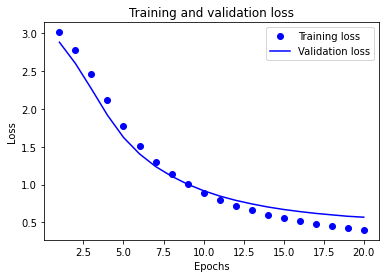

In [198]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [199]:
history.history.keys()

dict_keys(['loss', 'f1_weighted', 'val_loss', 'val_f1_weighted'])

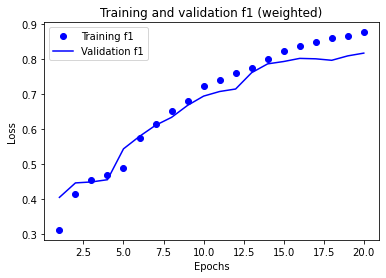

In [200]:
plt.clf()   # clear figure

f1 = history.history['f1_weighted']
val_f1 = history.history['val_f1_weighted']

plt.plot(epochs, f1, 'bo', label='Training f1')
plt.plot(epochs, val_f1, 'b', label='Validation f1')
plt.title('Training and validation f1 (weighted)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [232]:
subset_size = len(status_bigrams_list)
vectorizer = TfidfVectorizer(token_pattern=r"\w+\/?|\_\w+", vocabulary=vocab, lowercase=False)
X = vectorizer.fit_transform(status_bigrams_list[:subset_size])
X = X.A

# TRAIN vs TEST
x_train_full, x_test, y_train_full, y_test = train_test_split(X, one_hot_labels[:subset_size], test_size=0.1, random_state=1)

# actual TRAIN vs. internal VALIDATION data
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.1, random_state=1)

In [233]:
print(
    x_train.shape,
    y_train.shape,
    x_val.shape,
    y_val.shape,
    x_test.shape,
    y_test.shape)

(37397, 10053) (37397, 22) (4156, 10053) (4156, 22) (4618, 10053) (4618, 22)


In [238]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(len(x_train[0]),)))
model.add(layers.Dense(512, activation='relu', input_shape=(len(x_train[0]),)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(22, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=[f1_weighted])
model.fit(x_train,
          y_train,
          epochs=20,
          batch_size=2048,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/data/ops/dataset_ops.py:3703: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  warnings.warn(


Epoch 1/20
19/19 [==============================] - ETA: 0s - loss: 1.9588 - f1_weighted: 0.3204

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/data/ops/dataset_ops.py:3703: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  warnings.warn(


19/19 [==============================] - 3s 153ms/step - loss: 1.9289 - f1_weighted: 0.3292 - val_loss: 0.6395 - val_f1_weighted: 0.8207
Epoch 2/20
19/19 [==============================] - 2s 128ms/step - loss: 0.5761 - f1_weighted: 0.8088 - val_loss: 0.4763 - val_f1_weighted: 0.8533
Epoch 3/20
19/19 [==============================] - 2s 123ms/step - loss: 0.4300 - f1_weighted: 0.8544 - val_loss: 0.4692 - val_f1_weighted: 0.8572
Epoch 4/20
19/19 [==============================] - 2s 119ms/step - loss: 0.3704 - f1_weighted: 0.8703 - val_loss: 0.4975 - val_f1_weighted: 0.8300
Epoch 5/20
19/19 [==============================] - 2s 126ms/step - loss: 0.3247 - f1_weighted: 0.8847 - val_loss: 0.4528 - val_f1_weighted: 0.8764
Epoch 6/20
19/19 [==============================] - 2s 118ms/step - loss: 0.2824 - f1_weighted: 0.9040 - val_loss: 0.4574 - val_f1_weighted: 0.8888
Epoch 7/20
19/19 [==============================] - 2s 126ms/step - loss: 0.2520 - f1_weighted: 0.9155 - val_loss: 0.4821 -

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/data/ops/dataset_ops.py:3703: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  warnings.warn(


145/145 [==============================] - 7s 49ms/step - loss: 0.6753 - f1_weighted: 0.8587


In [239]:
results

[0.6753405928611755, 0.858659029006958]

In [ ]:
f1_weighted


Our approach reaches an accuracy of ~78%. With a balanced binary classification problem, the accuracy reached by a purely random classifier 
would be 50%, but in our case it is closer to 19%, so our results seem pretty good, at least when compared to a random baseline:

In [ ]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

## Generating predictions on new data

We can verify that the `predict` method of our model instance returns a probability distribution over all 46 topics. Let's generate topic 
predictions for all of the test data:

In [ ]:
predictions = model.predict(x_test)

Each entry in `predictions` is a vector of length 46:

In [ ]:
predictions[0].shape

The coefficients in this vector sum to 1:

In [2]:
np.sum(predictions[0])

NameError: name 'np' is not defined

The largest entry is the predicted class, i.e. the class with the highest probability:

In [ ]:
np.argmax(predictions[0])

## A different way to handle the labels and the loss

We mentioned earlier that another way to encode the labels would be to cast them as an integer tensor, like such:

In [ ]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)


The only thing it would change is the choice of the loss function. Our previous loss, `categorical_crossentropy`, expects the labels to 
follow a categorical encoding. With integer labels, we should use `sparse_categorical_crossentropy`:

In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

This new loss function is still mathematically the same as `categorical_crossentropy`; it just has a different interface.

## On the importance of having sufficiently large intermediate layers


We mentioned earlier that since our final outputs were 46-dimensional, we should avoid intermediate layers with much less than 46 hidden 
units. Now let's try to see what happens when we introduce an information bottleneck by having intermediate layers significantly less than 
46-dimensional, e.g. 4-dimensional.

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))


Our network now seems to peak at ~71% test accuracy, a 8% absolute drop. This drop is mostly due to the fact that we are now trying to 
compress a lot of information (enough information to recover the separation hyperplanes of 46 classes) into an intermediate space that is 
too low-dimensional. The network is able to cram _most_ of the necessary information into these 8-dimensional representations, but not all 
of it.

## Further experiments

* Try using larger or smaller layers: 32 units, 128 units...
* We were using two hidden layers. Now try to use a single hidden layer, or three hidden layers.

## Wrapping up


Here's what you should take away from this example:

* If you are trying to classify data points between N classes, your network should end with a `Dense` layer of size N.
* In a single-label, multi-class classification problem, your network should end with a `softmax` activation, so that it will output a 
probability distribution over the N output classes.
* _Categorical crossentropy_ is almost always the loss function you should use for such problems. It minimizes the distance between the 
probability distributions output by the network, and the true distribution of the targets.
* There are two ways to handle labels in multi-class classification:
    ** Encoding the labels via "categorical encoding" (also known as "one-hot encoding") and using `categorical_crossentropy` as your loss 
function.
    ** Encoding the labels as integers and using the `sparse_categorical_crossentropy` loss function.
* If you need to classify data into a large number of categories, then you should avoid creating information bottlenecks in your network by having 
intermediate layers that are too small.